In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
import urllib.request

from geopy.geocoders import Nominatim
pd.set_option('display.max_columns', None)

In [ ]:
start_date = input("Enter start date in yyyy/mm/dd format :")

In [ ]:
start_date = start_date.replace('/','')

In [ ]:
end_date = input("Enter end date in yyyy/mm/dd format :")

In [ ]:
end_date = end_date.replace('/','')

In [ ]:
address = input("Enter city name:")

In [ ]:
geolocator = Nominatim(user_agent="Kartikey")
location= geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude

In [ ]:
#url = 'https://power.larc.nasa.gov//api/temporal/daily/point?parameters=T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE&community=RE&longitude=longitude1&latitude=latitude1&start=start_date&end=end_date&format=CSV'

In [ ]:
#urllib.request.urlretrieve(url,'weather.csv')
#if someone wanst to take Data from NASA API

In [ ]:
#df = pd.read_csv('weather.csv',skiprows=14)
df = pd.read_csv('/content/POWER_Point_Daily_19820101_20210331_030d5768N_078d4940E_LST.csv')
df.head()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,WS10M
0,1982,1,1,14.94,2.58,2.76,35.19,-1.000000e-08,2.09
1,1982,1,2,15.50,2.85,3.21,34.69,-1.000000e-08,2.22
2,1982,1,3,14.44,2.90,2.33,29.31,-1.000000e-08,1.66
3,1982,1,4,7.72,-0.85,2.22,73.31,2.550000e+00,2.23
4,1982,1,5,10.55,0.20,3.15,69.56,8.000000e-02,1.83


In [ ]:
df['YEAR']=df.YEAR.astype(str)
df['MO']=df.MO.astype(str)
df['DY']=df.DY.astype(str)
#df['DOY'].rjust(3 + len(df['DOY']), '0')
#df['date']=datetime.strptime(df['YEAR'] + "/" + df['DOY'], "%Y-%j").strftime("%m-%d-%Y")
df['date']=df['YEAR'].str.cat(df['MO'], sep= '/')
df['DATE']=df['date'].str.cat(df['DY'], sep= '/')
df.head()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,WS10M,date,DATE
0,1982,1,1,14.94,2.58,2.76,35.19,-1.000000e-08,2.09,1982/1,1982/1/1
1,1982,1,2,15.50,2.85,3.21,34.69,-1.000000e-08,2.22,1982/1,1982/1/2
2,1982,1,3,14.44,2.90,2.33,29.31,-1.000000e-08,1.66,1982/1,1982/1/3
3,1982,1,4,7.72,-0.85,2.22,73.31,2.550000e+00,2.23,1982/1,1982/1/4
4,1982,1,5,10.55,0.20,3.15,69.56,8.000000e-02,1.83,1982/1,1982/1/5


In [ ]:
df.drop(columns=['YEAR','MO','DY','date'],axis=1,inplace=True)
df.set_index(['DATE'],inplace = True)
df.head()

,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,WS10M
DATE,,,,,,
1982/1/1,14.94,2.58,2.76,35.19,-1.000000e-08,2.09
1982/1/2,15.50,2.85,3.21,34.69,-1.000000e-08,2.22
1982/1/3,14.44,2.90,2.33,29.31,-1.000000e-08,1.66
1982/1/4,7.72,-0.85,2.22,73.31,2.550000e+00,2.23
1982/1/5,10.55,0.20,3.15,69.56,8.000000e-02,1.83


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_scaled = sc.fit_transform(df)

In [ ]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df_scaled, test_size=0.2, shuffle = False)

x_train, y_train, x_test, y_test= [],[],[],[]
for i in range (1,len(train)):
  x_train.append(train[i-1])
  y_train.append(train[i])
for i in range (1,len(test)):
  x_test.append(test[i-1])
  y_test.append(test[i])

In [ ]:
x_train, y_train= np.array(x_train), np.array(y_train)
x_test, y_test= np.array(x_test), np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(6,input_dim=6, activation= 'relu'))
model.add(Dense(10,activation= 'relu'))
model.add(Dense(10,activation= 'relu'))
model.add(Dense(6))
model.summary()
model.compile(optimizer = 'adam', loss='mse', metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 10)                70        
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 6)                 66        
                                                                 
Total params: 288 (1.12 KB)
Trainable params: 288 (1.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 100, batch_size=15, shuffle=False)

Epoch 1/100
765/765 [==============================] - 3s 3ms/step - loss: 0.0386 - accuracy: 0.2630 - val_loss: 0.0086 - val_accuracy: 0.4389
Epoch 2/100
765/765 [==============================] - 3s 4ms/step - loss: 0.0061 - accuracy: 0.5014 - val_loss: 0.0035 - val_accuracy: 0.6720
Epoch 3/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0027 - accuracy: 0.6723 - val_loss: 0.0026 - val_accuracy: 0.7107
Epoch 4/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 0.6940 - val_loss: 0.0024 - val_accuracy: 0.7118
Epoch 5/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 0.6840 - val_loss: 0.0022 - val_accuracy: 0.7076
Epoch 6/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 0.6806 - val_loss: 0.0020 - val_accuracy: 0.7090
Epoch 7/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 0.6876 - val_loss: 0.0017 - val_accuracy: 0.7128

<function matplotlib.pyplot.show(close=None, block=None)>

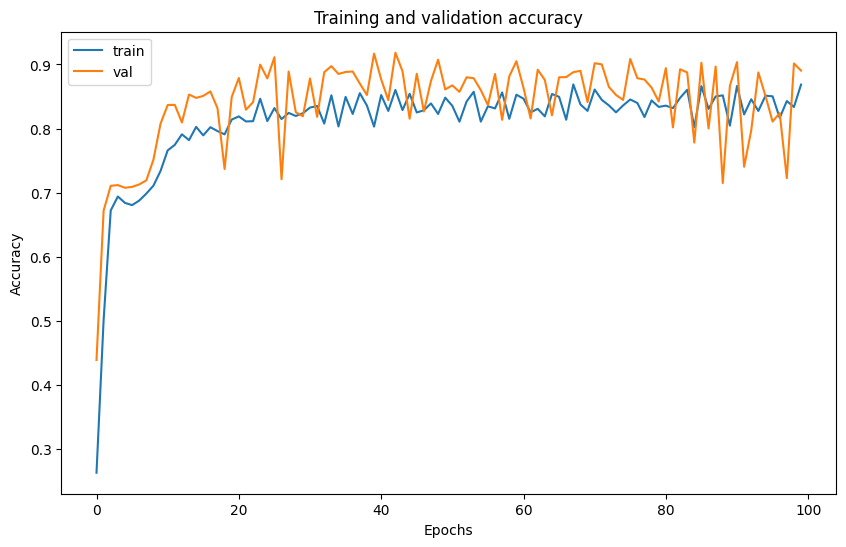

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show

In [53]:
final_pred=model.predict(y_test)

90/90 [==============================] - 0s 2ms/step


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, final_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, final_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, final_pred)*100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.020827932545358707
Mean Squared Error (MSE): 0.0006974373791765304
Root Mean Squared Error (RMSE): 0.02640903972461949
R-squared (R2): 96.82466595739169
